# Medical Cost Analsys

In [118]:

# Gerekli kütüphanelerin dahil edilmesi.
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [119]:
# insurance dataları import edildi.
df_insurance = pd.read_csv("insurance.csv")

In [120]:
# Bakalım içeride neler var?
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
# Data frame içerisinde null değer var mı toplamlarını inceleyelim.
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 1. BMI(Vucüt kitle indeksi)'nin dağılımının incelenmesi

| Category | Scala |
|---|---|
| Underweight | < 18.5 |
| Normal | 18.5 - 24.9 |
| Overweight | 25 - 29.9 |
| Obese | 30 - 34.9 |
| Extremly Obese | > 35 |

Yukarıdaki tabloya göre kadın ve erkeklerdeki BMI dağılımını gösterirsek.

In [122]:
df_insurance["bmi"].count()

1338

In [123]:

bmi_underweight = (df_insurance["bmi"] < 18.5).sum()
print("BMI Underweight Count:", bmi_underweight)

bmi_normal = ((18.5 < df_insurance["bmi"]) & (df_insurance["bmi"] < 24.9)).sum()

print("BMI Normal Count: ", bmi_normal)

bmi_overweight = ((25 <= df_insurance["bmi"]) & (df_insurance["bmi"] < 29.9)).sum()
print("BMI Overweight Count: ", bmi_overweight)

bmi_obese = ((30 <= df_insurance["bmi"]) & (df_insurance["bmi"] < 34.9)).sum()
print("BMI Obese Count: ", bmi_obese)

bmi_extremly_obese = ((35 <= df_insurance["bmi"])).sum()
print("BMI Extremly Obese Count: ", bmi_extremly_obese)

# Dataları bu şekilde tanımlayabiliriz.
bmi_key = ["Underweight", "Normal", "Overweight", "Obese", "Extremly Obese"]
bmi_counts = [bmi_underweight, bmi_normal, bmi_overweight, bmi_obese, bmi_extremly_obese]

print()

print("BMI Key: ", bmi_key)
print("BMI Counts: ", bmi_counts)

# Ve ya data frame olarak da tanımlayabiliriz.
bmi_data = pd.DataFrame({
    "Underweight": [bmi_underweight],
    "Normal": [bmi_normal],
    "Overweight": [bmi_overweight],
    "Obese": [bmi_obese],
    "Extremly Obese": [bmi_extremly_obese],
    })

print()

print(bmi_data)

BMI Underweight Count: 20
BMI Normal Count:  221
BMI Overweight Count:  374
BMI Obese Count:  387
BMI Extremly Obese Count:  316

BMI Key:  ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremly Obese']
BMI Counts:  [20, 221, 374, 387, 316]

   Underweight  Normal  Overweight  Obese  Extremly Obese
0           20     221         374    387             316


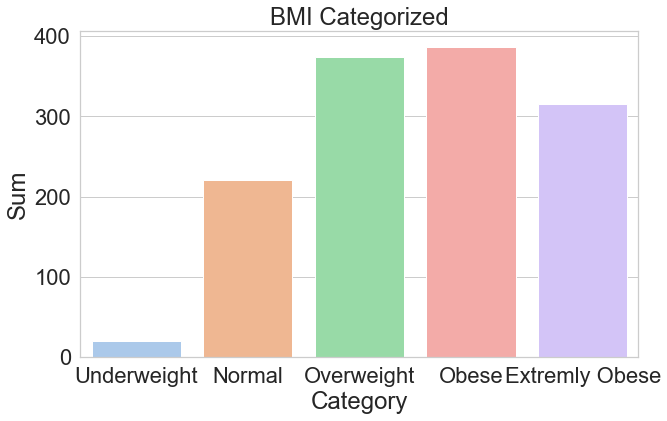

In [124]:

plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid", palette="pastel", font_scale=2)

p = sns.barplot(data = bmi_data)
p.set_xlabel("Category")
p.set_ylabel("Sum")
p.set_title("BMI Categorized")

plt.show()
